<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/Classification_CXR_Covid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from sklearn.metrics import plot_confusion_matrix

# Clone Dataset

In [ ]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/This-is-splitted-for-COVID-and-NORMAL-Only.git

fatal: destination path 'This-is-splitted-for-COVID-and-NORMAL-Only' already exists and is not an empty directory.


In [ ]:
import os
base_dir = '/content/This-is-splitted-for-COVID-and-NORMAL-Only'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
#train_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

test_covid_dir = os.path.join(test_dir, 'Covid')
test_normal_dir = os.path.join(test_dir, 'Normal')
#test_Pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:3])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:3])

#train_Pneumonia_names = os.listdir(train_Pneumonia_dir)
#print(train_Pneumonia_names[:3])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:3])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:3])

#test_Pneumonia_names = os.listdir(test_Pneumonia_dir)
#print(test_Pneumonia_names[:3])

['COVID-19 (404).png', 'COVID-19 (592).png', 'COVID-19 (541).png']
['NORMAL (382).png', 'NORMAL (754).png', 'NORMAL (454).png']
['1-s2.0-S2387020620301959-gr4_lrg-b.png', '00870a9c.jpg', 'ee2d1bf6.jpg']
['NORMAL (752).png', 'NORMAL (893).png', 'NORMAL (1006).png']


In [ ]:
print("train dataset covid images: ", len(train_covid_names))
print("train dataset normal images: ", len(train_normal_names))
#print("train dataset Pneumonia images: ", len(train_Pneumonia_names))
print("test dataset covid images: ", len(test_covid_names))
print("test dataset normal images: ", len(test_normal_names))
#print("test dataset Pneumonia images: ", len(test_Pneumonia_names))

print("total train images: ", len(train_covid_names+train_normal_names))
print("total test images: ", len(test_covid_names+test_normal_names))

train dataset covid images:  1330
train dataset normal images:  1072
test dataset covid images:  333
test dataset normal images:  269
total train images:  2402
total test images:  602


# Generating Training, Validation & testing Batches

In [ ]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Generator for our Validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

#Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')


Found 1922 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 602 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

# Data Visualization





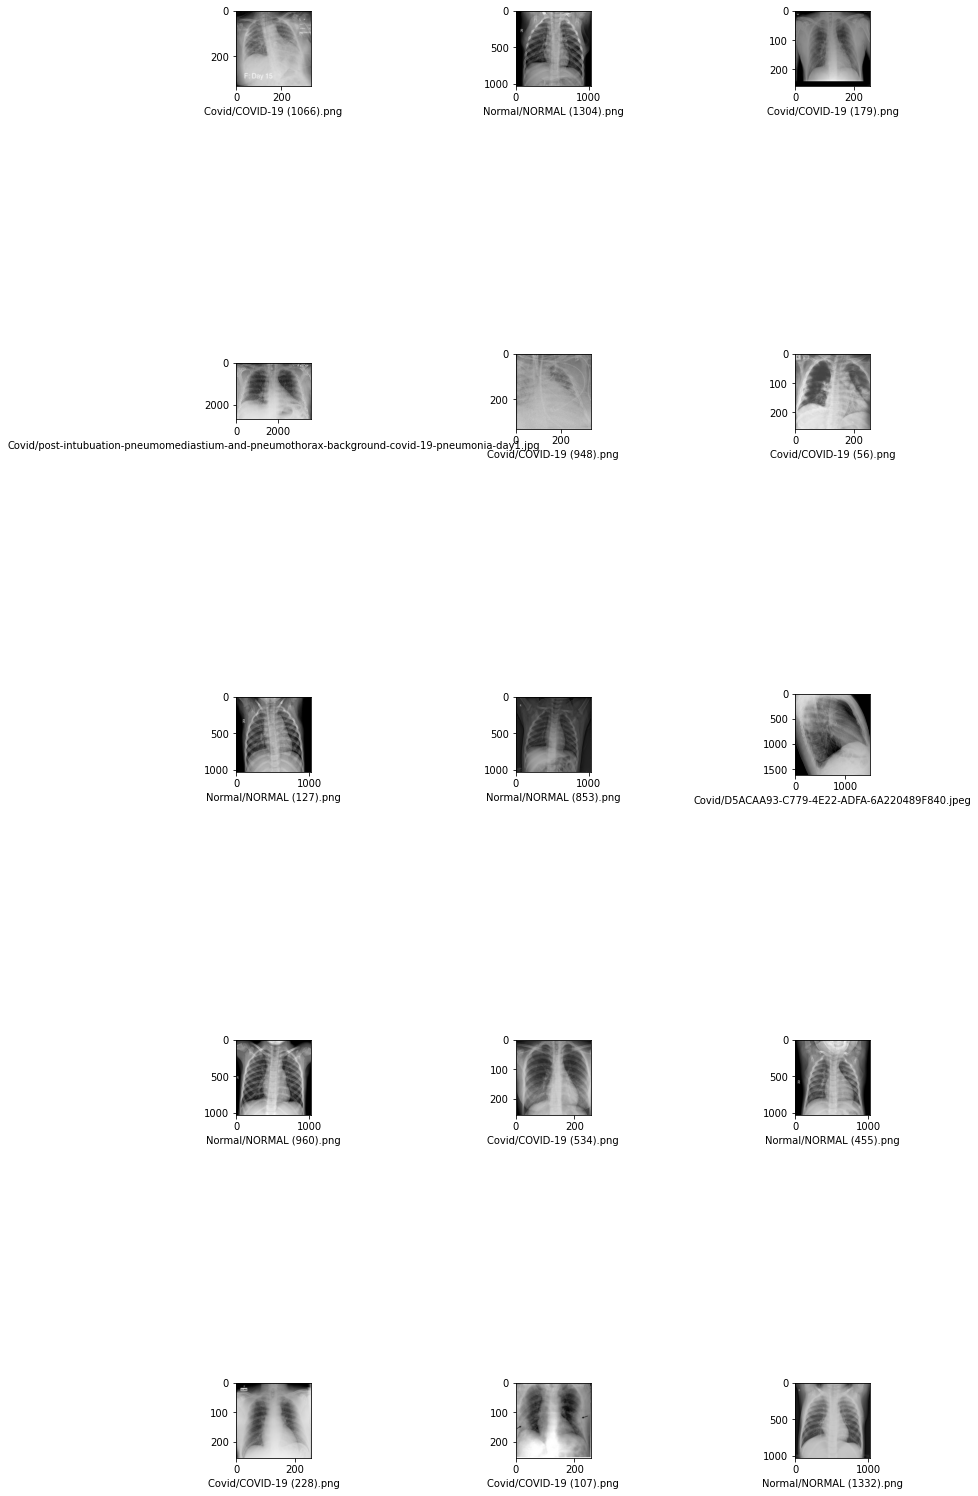

In [ ]:
plt.figure(figsize=(12, 24))
files = 0
for i in range(0, 15):
    
    plt.subplot(5, 3, i+1)
    
    for X_batch in range(1922):
        img = mpimg.imread(train_generator.filepaths[files])
        #image = X_batch[files]
        plt.imshow(img)
        plt.xlabel(train_generator.filenames[files] )
        files = random.randrange(0, 1922, 1)
        break
        
plt.tight_layout()
plt.show()

# Dataset

## Credits and Links

1. [Covid Chest X Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)

  520 Covid-19 Images

2. [COVID-19 Radiography Database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)

  1341 Normal Images<br>
  1143 Covid-19 Images <br>
  1345 Viral Pneumonia Images<br>


# `Our Dataset`
Split | Normal | Covid19|Viral Pneumonia|Total|
------|:------:|:------:|:---:          |:---:|
Train | 1072   |1330    |1076           |3478 |
Test  | 269    |333     | 269           |871  |
**Total**| **1341**   | **1663**    |   **1345**     |   **4349**   |

# Build CNN Model

In [ ]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

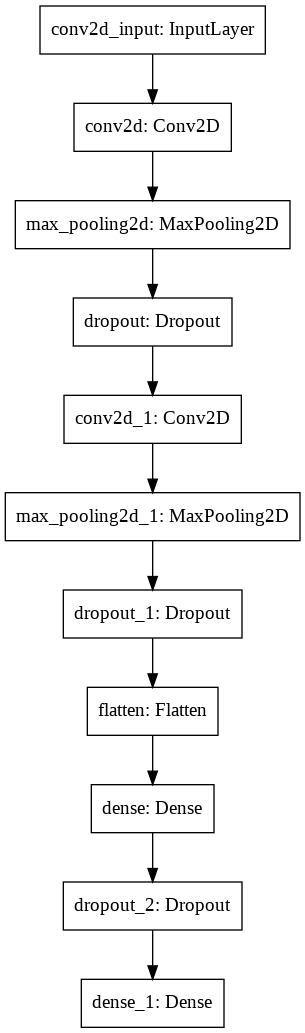

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# Model Without Dropout Layer


model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

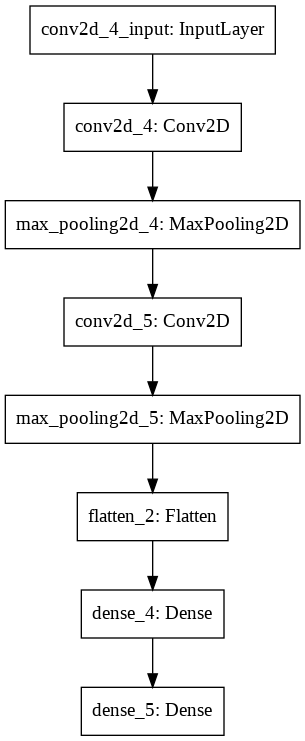

In [ ]:
tf.keras.utils.plot_model(model2)

In [ ]:
# Model with batch Normalization layer

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_94 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_95 (Batc (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 71, 71, 64)        18496     
_________________________________________________________________
batch_normalization_96 (Batc (None, 71, 71, 64)       

# Compile & Train Model

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model2.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model3.compile(Adam(lr = 0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
# train the model
history1 = model.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/30
61/61 [==============================] - 47s 766ms/step - loss: 1.9485 - accuracy: 0.7101 - val_loss: 0.3027 - val_accuracy: 0.9000
Epoch 2/30
61/61 [==============================] - 45s 741ms/step - loss: 0.1937 - accuracy: 0.9327 - val_loss: 0.1227 - val_accuracy: 0.9625
Epoch 3/30
61/61 [==============================] - 46s 756ms/step - loss: 0.1678 - accuracy: 0.9402 - val_loss: 0.1604 - val_accuracy: 0.9375
Epoch 4/30
61/61 [==============================] - 45s 744ms/step - loss: 0.1663 - accuracy: 0.9370 - val_loss: 0.1384 - val_accuracy: 0.9594
Epoch 5/30
61/61 [==============================] - 46s 750ms/step - loss: 0.1526 - accuracy: 0.9483 - val_loss: 0.1616 - val_accuracy: 0.9812
Epoch 6/30
61/61 [==============================] - 46s 765ms/step - loss: 0.1213 - accuracy: 0.9628 - val_loss: 0.1443 - val_accuracy: 0.9719
Epoch 7/30
61/61 [==============================] - 46s 751ms/step - loss: 0.1348 - accuracy: 0.9560 - val_loss: 0.2149 - val_accuracy: 0.9187

In [ ]:
# train the model
history2 = model2.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/30
61/61 [==============================] - 48s 773ms/step - loss: 1.9670 - accuracy: 0.7779 - val_loss: 0.1103 - val_accuracy: 0.9656
Epoch 2/30
61/61 [==============================] - 46s 755ms/step - loss: 0.1046 - accuracy: 0.9656 - val_loss: 0.1914 - val_accuracy: 0.9500
Epoch 3/30
61/61 [==============================] - 46s 749ms/step - loss: 0.1384 - accuracy: 0.9456 - val_loss: 0.1541 - val_accuracy: 0.9406
Epoch 4/30
61/61 [==============================] - 46s 752ms/step - loss: 0.1123 - accuracy: 0.9663 - val_loss: 0.1448 - val_accuracy: 0.9406
Epoch 5/30
61/61 [==============================] - 46s 755ms/step - loss: 0.1377 - accuracy: 0.9464 - val_loss: 0.1103 - val_accuracy: 0.9688
Epoch 6/30
61/61 [==============================] - 46s 751ms/step - loss: 0.1118 - accuracy: 0.9637 - val_loss: 0.0631 - val_accuracy: 0.9844
Epoch 7/30
61/61 [==============================] - 46s 748ms/step - loss: 0.0762 - accuracy: 0.9751 - val_loss: 0.0474 - val_accuracy: 0.9844

In [ ]:
# train the model
history3 = model3.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/30
61/61 [==============================] - 48s 767ms/step - loss: 1.3785 - accuracy: 0.8658 - val_loss: 16.8737 - val_accuracy: 0.5562
Epoch 2/30
61/61 [==============================] - 47s 768ms/step - loss: 0.5806 - accuracy: 0.9436 - val_loss: 37.5913 - val_accuracy: 0.5406
Epoch 3/30
61/61 [==============================] - 46s 755ms/step - loss: 0.1734 - accuracy: 0.9677 - val_loss: 56.5297 - val_accuracy: 0.5469
Epoch 4/30
61/61 [==============================] - 46s 762ms/step - loss: 0.1065 - accuracy: 0.9730 - val_loss: 60.6008 - val_accuracy: 0.5594
Epoch 5/30
61/61 [==============================] - 47s 764ms/step - loss: 0.0780 - accuracy: 0.9772 - val_loss: 39.3642 - val_accuracy: 0.5500
Epoch 6/30
61/61 [==============================] - 46s 760ms/step - loss: 0.0892 - accuracy: 0.9705 - val_loss: 33.4949 - val_accuracy: 0.5469
Epoch 7/30
61/61 [==============================] - 47s 767ms/step - loss: 0.1138 - accuracy: 0.9715 - val_loss: 14.0853 - val_accuracy:

# Plotting Loss and Accuracy Graph

Text(0.5, 1.0, 'Accuracy Evolution')

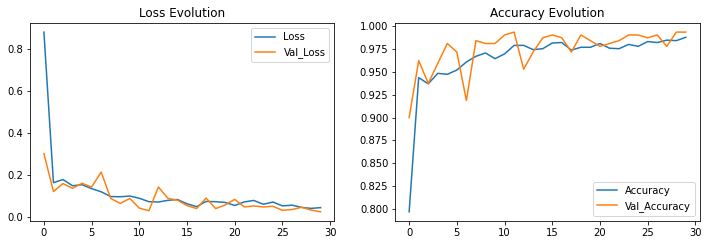

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

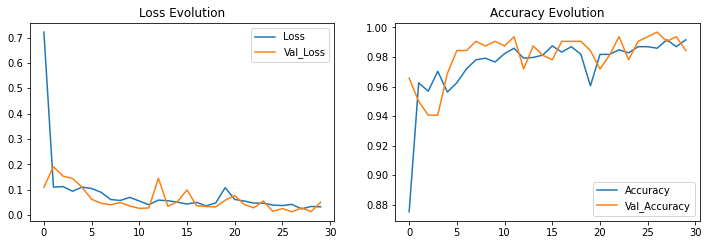

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

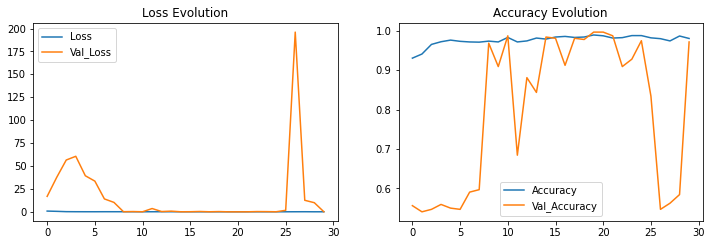

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Evaluation of Model

In [ ]:
test_loss, test_acc = model.evaluate(test_generator )
print('test acc: {} test loss: {}'.format(test_acc,test_loss))

19/19 [==============================] - 10s 499ms/step - loss: 0.0636 - accuracy: 0.9767
test acc: 0.9767441749572754 test loss: 0.06356155872344971


In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 10s 505ms/step - loss: 0.0636 - accuracy: 0.9767
Test Accuracy: 97.67%
61/61 [==============================] - 37s 602ms/step - loss: 0.0317 - accuracy: 0.9906
Train Accuracy: 99.06%


In [ ]:
evaluation2 = model2.evaluate(test_generator )
print(f"Test Accuracy: {evaluation2[1] * 100:.2f}%")

evaluation2 = model2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation2[1] * 100:.2f}%")

19/19 [==============================] - 10s 501ms/step - loss: 0.0524 - accuracy: 0.9867
Test Accuracy: 98.67%
61/61 [==============================] - 37s 605ms/step - loss: 0.0288 - accuracy: 0.9906
Train Accuracy: 99.06%


In [ ]:
evaluation3 = model3.evaluate(test_generator)
print(f"Test Accuracy: {evaluation3[1] * 100:.2f}%")

evaluation3 = model3.evaluate(train_generator)
print(f"Train Accuracy: {evaluation3[1] * 100:.2f}%")

19/19 [==============================] - 10s 507ms/step - loss: 0.0796 - accuracy: 0.9718
Test Accuracy: 97.18%
61/61 [==============================] - 37s 602ms/step - loss: 0.1219 - accuracy: 0.9620
Train Accuracy: 96.20%


# Confusion Matrics

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: ignored

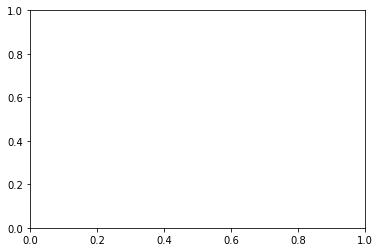

In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
pred = model.predict(test_generator)


pred1 = []
for i in range(len(pred)):
  d = pred[i]
  if d<0.5:
    pred1.append(0)
  else:
    pred1.append(1)

#cnf_matrix = confusion_matrix(test_generator.classes, pred1, labels=['Covid','Normal'])
#print(cnf_matrix)
pd.DataFrame(classification_report(test_generator.classes,pred1, output_dict=True))

ValueError: ignored

In [ ]:
# cnf_matrix = confusion_matrix(y_true, y_pred,labels=['Cat', 'Dog', 'Rabbit'])
# np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cat', 'Dog', 'Rabbit'],
                      title='Confusion matrix, without normalization')

In [ ]:

pred = model2.predict(test_generator)

print(confusion_matrix(test_generator.classes, pred > 0.5))
pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))

In [ ]:

pred = model3.predict(test_generator)

print(confusion_matrix(test_generator.classes, pred > 0.5))
pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))

# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

![download.png](https://pytorch.org/assets/images/densenet1.png)

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K


In [ ]:
densedet121 = DenseNet121(input_shape=(150, 150, 3), include_top=False, weights='imagenet', pooling='max')

densedet121.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
_______________________

In [ ]:
layers = densedet121.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {densedet121.input}")
print(f"The output shape {densedet121.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='max_pool/Max:0', description="created by layer 'max_pool'")


In [ ]:

#model = Sequential()
densedet121 = DenseNet121(include_top=False, weights='imagenet')
x = densedet121.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model4 = Model(inputs=densedet121.input, outputs=predictions)
#model.add(densedet121)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))


model4.compile(
               loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785422 to fit



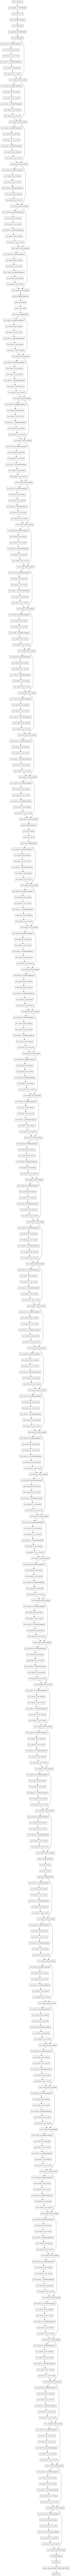

In [ ]:
tf.keras.utils.plot_model(model4)

In [ ]:
history4 = model4.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/30
61/61 [==============================] - 62s 845ms/step - loss: 0.1821 - accuracy: 0.9411 - val_loss: 45.0952 - val_accuracy: 0.6094
Epoch 2/30
61/61 [==============================] - 49s 800ms/step - loss: 0.0732 - accuracy: 0.9753 - val_loss: 40.4667 - val_accuracy: 0.5625
Epoch 3/30
61/61 [==============================] - 49s 797ms/step - loss: 0.0986 - accuracy: 0.9658 - val_loss: 9.4152 - val_accuracy: 0.5875
Epoch 4/30
61/61 [==============================] - 48s 795ms/step - loss: 0.0808 - accuracy: 0.9717 - val_loss: 0.6341 - val_accuracy: 0.9125
Epoch 5/30
61/61 [==============================] - 48s 784ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.1163 - val_accuracy: 0.9469
Epoch 6/30
61/61 [==============================] - 48s 793ms/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.2978 - val_accuracy: 0.9563
Epoch 7/30
61/61 [==============================] - 48s 787ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 10.4342 - val_accuracy: 0.5

Text(0.5, 1.0, 'Accuracy Evolution')

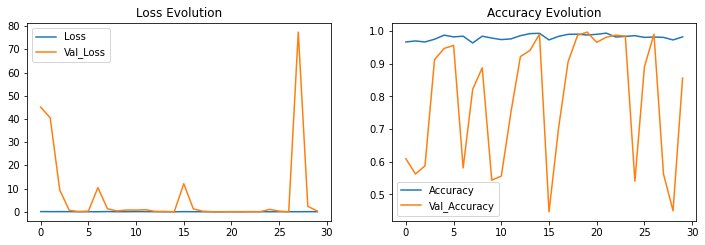

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation4 = model4.evaluate(test_generator)
print(f"Test Accuracy: {evaluation4[1] * 100:.2f}%")

evaluation4 = model4.evaluate(train_generator)
print(f"Train Accuracy: {evaluation4[1] * 100:.2f}%")

19/19 [==============================] - 10s 550ms/step - loss: 0.1555 - accuracy: 0.9468
Test Accuracy: 94.68%
61/61 [==============================] - 38s 620ms/step - loss: 0.3745 - accuracy: 0.8642
Train Accuracy: 86.42%


# Evaluation

In [ ]:
predicted_vals = model.predict(test_generator, steps=len(test_generator))

print(confusion_matrix(test_generator.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test_generator.classes, predicted_vals > 0.5, output_dict=True))

[[171 162]
 [150 119]]


,0,1,accuracy,macro avg,weighted avg
precision,0.532710,0.423488,0.481728,0.478099,0.483905
recall,0.513514,0.442379,0.481728,0.477946,0.481728
f1-score,0.522936,0.432727,0.481728,0.477832,0.482627
support,333.000000,269.000000,0.481728,602.000000,602.000000


# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

![download7.png](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16
import keras

vgg16_base_model = VGG16(input_shape=(150,150,3),include_top=False,weights='imagenet')

    
vgg16_base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:

vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

In [ ]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history5 = vgg16_model.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
)


Epoch 1/30
61/61 [==============================] - 55s 832ms/step - loss: 0.4553 - accuracy: 0.7888 - val_loss: 108.7304 - val_accuracy: 0.4281
Epoch 2/30
61/61 [==============================] - 50s 820ms/step - loss: 0.1836 - accuracy: 0.9467 - val_loss: 13.4425 - val_accuracy: 0.5344
Epoch 3/30
61/61 [==============================] - 50s 822ms/step - loss: 0.1893 - accuracy: 0.9337 - val_loss: 0.2814 - val_accuracy: 0.9031
Epoch 4/30
61/61 [==============================] - 50s 819ms/step - loss: 0.1401 - accuracy: 0.9492 - val_loss: 4.8190 - val_accuracy: 0.4406
Epoch 5/30
61/61 [==============================] - 50s 821ms/step - loss: 0.1050 - accuracy: 0.9633 - val_loss: 1.7968 - val_accuracy: 0.5500
Epoch 6/30
61/61 [==============================] - 50s 817ms/step - loss: 0.1163 - accuracy: 0.9687 - val_loss: 0.2308 - val_accuracy: 0.9312
Epoch 7/30
61/61 [==============================] - 50s 819ms/step - loss: 0.1257 - accuracy: 0.9597 - val_loss: 16.2654 - val_accuracy: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

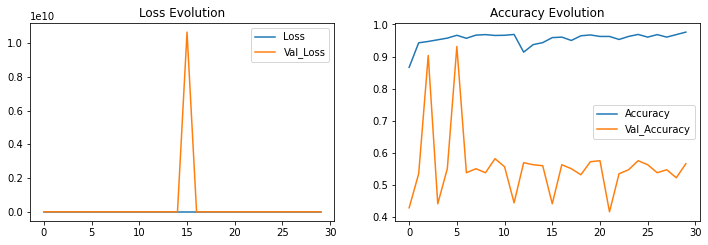

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history5.history['loss'], label='Loss')
plt.plot(history5.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history5.history['accuracy'], label='Accuracy')
plt.plot(history5.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation_vgg =vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation_vgg[1] * 100:.2f}%")

evaluation_vgg = vgg16_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation_vgg[1] * 100:.2f}%")

19/19 [==============================] - 11s 557ms/step - loss: 7.6911 - accuracy: 0.5532
Test Accuracy: 55.32%
61/61 [==============================] - 38s 614ms/step - loss: 7.7720 - accuracy: 0.5536
Train Accuracy: 55.36%


# ResNet50

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [ ]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(150,150,3), include_top=False, weights='imagenet')



94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history6 = resnet_model.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/30
61/61 [==============================] - 56s 821ms/step - loss: 0.3588 - accuracy: 0.8372 - val_loss: 2.6110 - val_accuracy: 0.5594
Epoch 2/30
61/61 [==============================] - 49s 804ms/step - loss: 0.1067 - accuracy: 0.9638 - val_loss: 592.0001 - val_accuracy: 0.4437
Epoch 3/30
61/61 [==============================] - 49s 810ms/step - loss: 0.1225 - accuracy: 0.9589 - val_loss: 5.5095 - val_accuracy: 0.4469
Epoch 4/30
61/61 [==============================] - 49s 803ms/step - loss: 0.0727 - accuracy: 0.9751 - val_loss: 1.1382 - val_accuracy: 0.4531
Epoch 5/30
61/61 [==============================] - 49s 799ms/step - loss: 0.1370 - accuracy: 0.9627 - val_loss: 265.7991 - val_accuracy: 0.4375
Epoch 6/30
61/61 [==============================] - 49s 797ms/step - loss: 0.1038 - accuracy: 0.9664 - val_loss: 4.3990 - val_accuracy: 0.5594
Epoch 7/30
61/61 [==============================] - 49s 795ms/step - loss: 0.1104 - accuracy: 0.9682 - val_loss: 6.0348 - val_accuracy: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

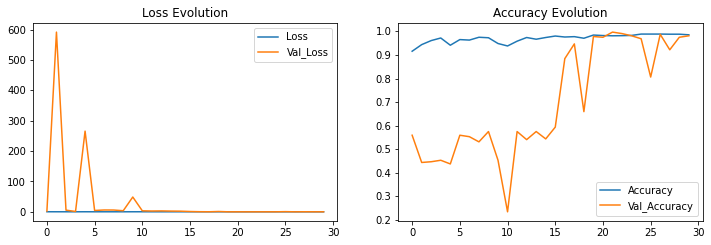

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history6.history['loss'], label='Loss')
plt.plot(history6.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history6.history['accuracy'], label='Accuracy')
plt.plot(history6.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation_resnet_model =resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation_resnet_model[1] * 100:.2f}%")

evaluation_resnet_model = resnet_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation_resnet_model[1] * 100:.2f}%")

19/19 [==============================] - 10s 519ms/step - loss: 0.1514 - accuracy: 0.9485
Test Accuracy: 94.85%
61/61 [==============================] - 38s 616ms/step - loss: 0.0897 - accuracy: 0.9651
Train Accuracy: 96.51%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
pred = resnet_model.predict(test_generator)

pred = np.argmax(pred, axis=1)
cnf_matrix = confusion_matrix(test_generator.classes, pred)
print(cnf_matrix)
pd.DataFrame(classification_report(test_generator.classes,pred, output_dict=True))

plot_confusion_matrix(cnf_matrix, classes=['Covid','Normal'], title='Confusion matrix, without normalization', cmap=plt.cm.Accent)  
plt.show() 

[[333   0]
 [269   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: ignored

# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [ ]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights='imagenet')



87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

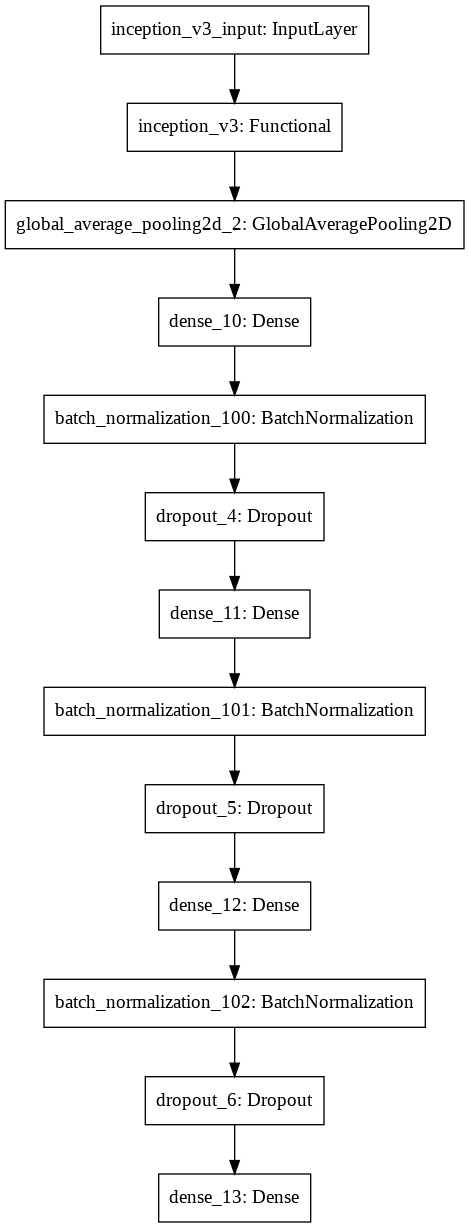

In [ ]:
tf.keras.utils.plot_model(inception_model)

In [ ]:
history7 = inception_model.fit(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/30
61/61 [==============================] - 57s 803ms/step - loss: 0.4751 - accuracy: 0.7890 - val_loss: 7.2705 - val_accuracy: 0.4469
Epoch 2/30
61/61 [==============================] - 47s 779ms/step - loss: 0.1415 - accuracy: 0.9568 - val_loss: 1.1435 - val_accuracy: 0.7563
Epoch 3/30
61/61 [==============================] - 48s 779ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 0.3141 - val_accuracy: 0.9094
Epoch 4/30
61/61 [==============================] - 47s 768ms/step - loss: 0.0893 - accuracy: 0.9717 - val_loss: 0.0413 - val_accuracy: 0.9844
Epoch 5/30
61/61 [==============================] - 48s 782ms/step - loss: 0.1016 - accuracy: 0.9712 - val_loss: 0.1523 - val_accuracy: 0.9438
Epoch 6/30
61/61 [==============================] - 47s 779ms/step - loss: 0.0486 - accuracy: 0.9859 - val_loss: 0.1445 - val_accuracy: 0.9438
Epoch 7/30
61/61 [==============================] - 47s 774ms/step - loss: 0.0177 - accuracy: 0.9978 - val_loss: 0.0631 - val_accuracy: 0.9750

Text(0.5, 1.0, 'Accuracy Evolution')

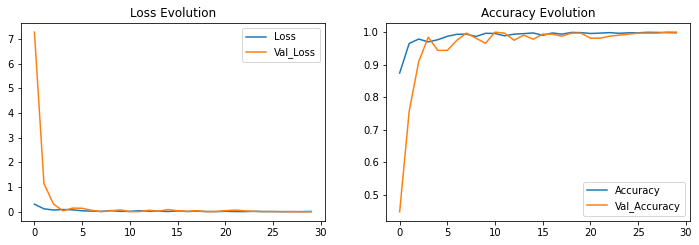

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history7.history['loss'], label='Loss')
plt.plot(history7.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history7.history['accuracy'], label='Accuracy')
plt.plot(history7.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation7 =inception_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation7[1] * 100:.2f}%")

evaluation7 = inception_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation7[1] * 100:.2f}%")

19/19 [==============================] - 10s 535ms/step - loss: 0.0082 - accuracy: 0.9983
Test Accuracy: 99.83%
61/61 [==============================] - 37s 608ms/step - loss: 0.0108 - accuracy: 0.9974
Train Accuracy: 99.74%


# Loading the Model

In [ ]:
from tensorflow.keras import models

In [ ]:
model_with_dropout = models.load_model('/content/gdrive/MyDrive/Temp/model1.h5')

In [ ]:
# Cloning dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

Cloning into 'Covid-19-CXR-Dataset'...
remote: Enumerating objects: 4366, done.
remote: Total 4366 (delta 0), reused 0 (delta 0), pack-reused 4366
Receiving objects: 100% (4366/4366), 2.82 GiB | 28.96 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (4350/4350), done.


In [ ]:
import os
base_dir = '/content/Covid-19-CXR-Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
#Generator for our test data
 # Reading Training Images 
import numpy as np
import glob
import cv2
path_l = glob.glob("/content/Covid-19-CXR-Dataset/train/Viral Pneumonia/*.png")
cv_img = []
for img in path_l:
  n = cv2.imread(img)
  n = cv2.resize(n,(150,150))
  cv_img.append(n)
Test = np.asarray(cv_img)
print(Test.shape)

(1076, 150, 150, 3)


In [ ]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_Test = Test/255


In [ ]:
import os
base_dir = '/content/Covid-19-CXR-Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

#Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 3478 images belonging to 3 classes.


In [ ]:
test_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
# Creating labels 
labels0 = np.zeros(len(X_Test))
for i in range(len(X_Test)):
  labels0[i] = 1

labels0

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
evaluation = model_with_dropout.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


109/109 [==============================] - 96s 884ms/step - loss: 4.4801 - accuracy: 0.4804
Test Accuracy: 48.04%


In [ ]:
pred = model_with_dropout.predict(test_generator)

In [ ]:
len(pred), len(test_generator.classes)

(3478, 3478)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


pred = np.argmax(pred, axis=1)
cnf_matrix = confusion_matrix(test_generator.classes, pred)
print(cnf_matrix)

[[1330    0    0]
 [1072    0    0]
 [1076    0    0]]


In [ ]:
# test your model with some images from your local computer to predict whether a patient is affected by Covid19 or not
import numpy as np
from google.colab import files 
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19')
  else:
    print('Normal')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name = 'model1.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model.save(path)

In [ ]:
model_save_name = 'model2.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model2.save(path)

In [ ]:
model_save_name = 'model3.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model3.save(path)

In [ ]:
model_save_name = 'model4.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model4.save(path)

In [ ]:
model_save_name = 'inception_model.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
inception_model.save(path)

In [ ]:
model_save_name = 'resnet_model.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
resnet_model.save(path)

In [ ]:
model_save_name = 'vgg16_model.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
vgg16_model.save(path)